### Tutorial for processing low-mag images

In [1]:
import torch
import ptolemy.algorithms as algorithms
import ptolemy.models as models
from ptolemy.Ptolemy import Ptolemy
from ptolemy.mrc import load_mrc
from ptolemy.visualization import viz_image
import matplotlib.pyplot as plt

In [2]:
ptolemy = Ptolemy()

In [3]:
ptolemy.update_noice_hole_intensity(15)

In [4]:
ex = load_mrc('example_images/low_mag/20may08a_16760340.mrc')

In [5]:
outputs = ptolemy.process_lm_image(ex)

In [6]:
raw_crops, centers, vertices, areas, mean_intensities, features, prior_scores = outputs

In [7]:
raw_crops, preprocessed_crops, centers, vertices, areas, mean_intensities = ptolemy.get_lm_crops(ex)

In [8]:
max(prior_scores)

0.3522914

In [9]:
if prior_scores is not None:
    print('x')

x


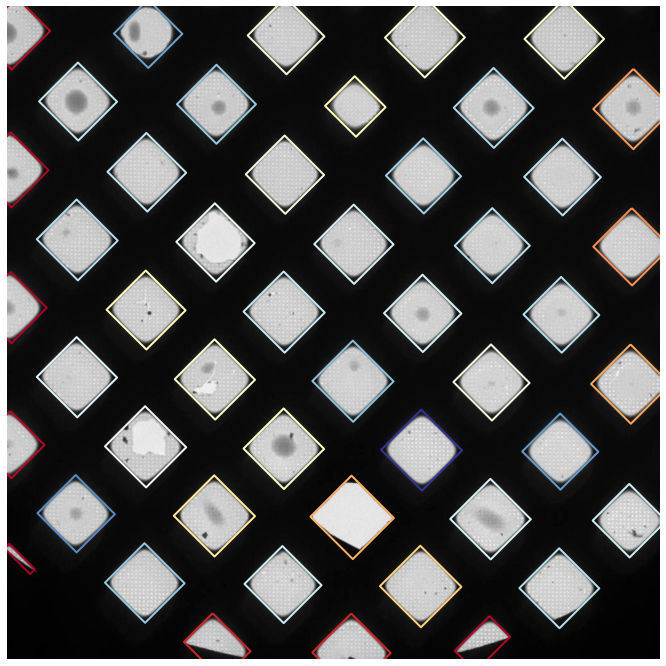

In [10]:
viz_image(ex, vertices, prior_scores)

In [9]:
len(raw_crops)

48

In [10]:
len(centers)

48

In [11]:
len(vertices)

48

In [12]:
len(areas)

48

In [13]:
len(mean_intensities)

48

In [14]:
len(features)

48

In [15]:
len(prior_scores)

48

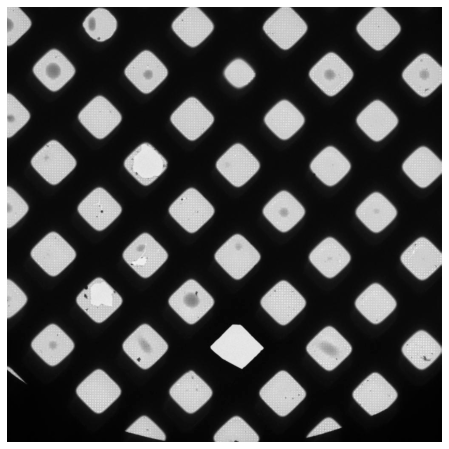

In [7]:
ex = load_mrc('example_images/low_mag/20may08a_16760340.mrc')

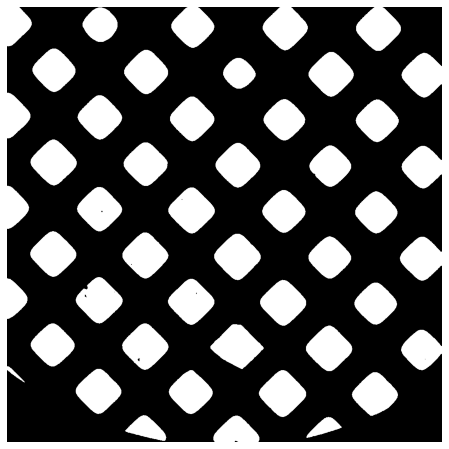

In [8]:
segmenter = algorithms.PMM_Segmenter()
ex.make_mask(segmenter)
ex.viz_mask()

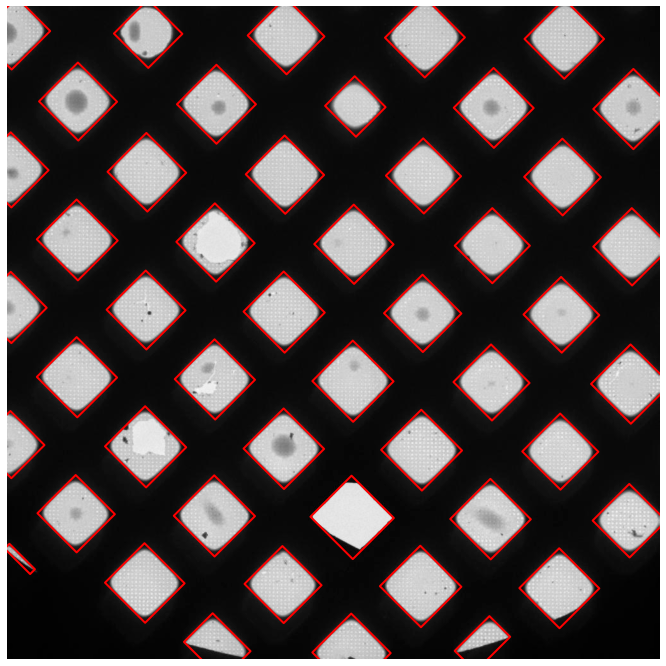

In [9]:
processor = algorithms.LowMag_Process_Mask()
ex.process_mask(processor)
ex.viz_boxes()

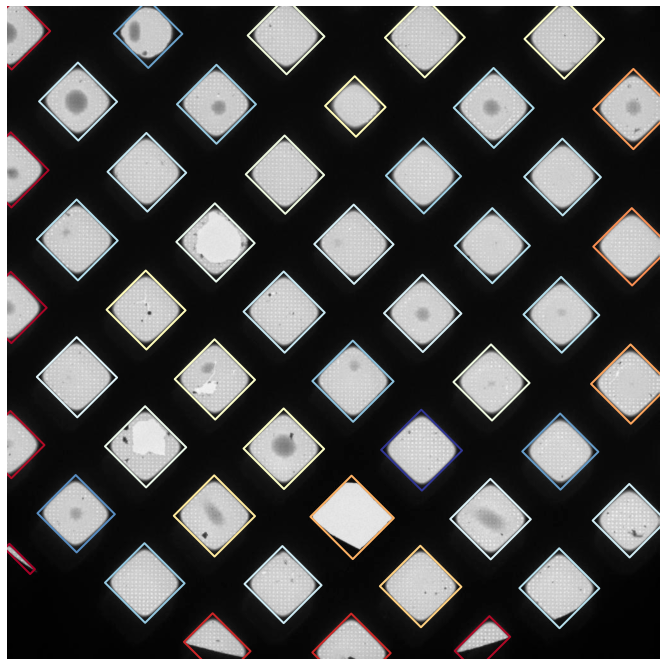

In [10]:
cropper = algorithms.LowMag_Process_Crops()
ex.get_crops(cropper)
model = models.LowMag_64x5_2ep()
model.load_state_dict(torch.load('weights/211215_lowmag_64x5_defaultadam_tightw_e2.torchmodel'))
wrapper = models.Wrapper(model)
ex.score_crops(wrapper, final=False)
ex.viz_boxes_and_scores()